# 8 Pandas 入门

学习内容：
* Series和DataFrame数据结构
* 选取和访问数据
* 常用操作


Pandas是Python数据分析的核心工具。它在Numpy基础上建立了一套完善处理索引的数据结构，并实现了索引对齐操作，大大降低了数据分析的编程门槛。

Pandas包含一系列重要的数据分析工具，如时间序列、分组统计等。

In [55]:
# 例子
# 假设我们要对两个资产的价格进行对比计算，但价格公布的时间不一样
import pandas as pd
p1 = pd.Series([101, 104, 103, 105, 100], index = pd.date_range('2020-01-01',periods = 5))
p2 = pd.Series([96, 100, 102, 101, 108, 109], index = pd.date_range('2020-01-02',periods = 6))
p1, p2

(2020-01-01    101
 2020-01-02    104
 2020-01-03    103
 2020-01-04    105
 2020-01-05    100
 Freq: D, dtype: int64,
 2020-01-02     96
 2020-01-03    100
 2020-01-04    102
 2020-01-05    101
 2020-01-06    108
 2020-01-07    109
 Freq: D, dtype: int64)

In [56]:
p1 / p2 - 1

2020-01-01         NaN
2020-01-02    0.083333
2020-01-03    0.030000
2020-01-04    0.029412
2020-01-05   -0.009901
2020-01-06         NaN
2020-01-07         NaN
Freq: D, dtype: float64

注意例子中的数据运算具有几个特征：

* 数据形状不同

* 运算是根据日期（索引）进行对齐之后进行的。

在使用Pandas时，最经常使用的模块为Series和DataFrame，在命名惯例中Pandas的别名为pd.
以下是经常引入的包及其命名惯例。


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

## 8.1 Pandas中的数据结构

Pandas中有两种主要的数据结构：Series和DataFrame.

### 创建Series对象

In [58]:
ser01 = Series([1, 4, 2, 8, 5])
ser01

0    1
1    4
2    2
3    8
4    5
dtype: int64

函数签名（部分参数）：pandas.Series(data = None, index = None, dtype = None, name = None)

如果没有引入Series模块，则需要指定其所在的包。如果没有指定索引，系统会自动指定一个RangeIndex。

我们也可以指定序列的标签。标签与数据值按顺序一一对应。

In [59]:
ser02 = pd.Series([8, 0, 3, 8, 6],
    index= ['1st', '3zd', '3', '3rd', '5th'])
ser02[:'3rd']

1st    8
3zd    0
3      3
3rd    8
dtype: int64

### Series对象的结构
可以发现，Series对象由索引和值构成。

* 使用index可以访问其索引对象

In [60]:
ser01.index, ser02.index

(RangeIndex(start=0, stop=5, step=1),
 Index(['1st', '3zd', '3', '3rd', '5th'], dtype='object'))

* 使用values可以访问其值

In [61]:
ser01.values  # 序列的值是什么对象？

array([1, 4, 2, 8, 5])

我们可以给Series对象指定名字，也可以为它的索引指定名字。

这样做的意义是更容易理解数据的含义，同时方便与DataFrame进行集成（作为行或列标签）。

In [62]:
ser02.name = 'cost'
ser02.index.name = 'track'
print(ser02)

track
1st    8
3zd    0
3      3
3rd    8
5th    6
Name: cost, dtype: int64


### Series对象的访问

可以将Series对象视为一维的ndarray，只不过它的数据都有一个数据索引/标签。

可以使用标签或使用整数索引访问Series对象的元素。

In [63]:
print('[1]', ser01[2])  # 序列的一个元素是什么对象？
print('[2]', ser01[1:3])  # 序列的一个切片是什么对象？
print('[3]', ser01[-3:-1])

[1] 2
[2] 1    4
2    2
dtype: int64
[3] 2    2
3    8
dtype: int64


In [64]:
print(ser02[:3])
print(ser02['1st':'3rd'])  # 注意区别在哪里？
# print(ser02[:'3rd']) # guess

track
1st    8
3zd    0
3      3
Name: cost, dtype: int64
track
1st    8
3zd    0
3      3
3rd    8
Name: cost, dtype: int64


In [65]:
val = str(np.pi - 3)[2:10+2]

pd.Series(list(val), index=range(1, 11))

1     1
2     4
3     1
4     5
5     9
6     2
7     6
8     5
9     3
10    5
dtype: object

In [66]:
s = pd.Series(list(val))
s.index = s.index + 1
s

1     1
2     4
3     1
4     5
5     9
6     2
7     6
8     5
9     3
10    5
dtype: object

### 使用标签索引切片 vs 使用序号索引切片

* 使用标签索引切片：结束标签均包含
* 使用序号索引切片：结束序号不包含

In [67]:
ser03 = Series([2, 8, 5, 7, 1], index = range(1,6))
print(ser03)

1    2
2    8
3    5
4    7
5    1
dtype: int64


In [68]:
print(ser03[2:4])  # 注意这里会产生歧义，你认为它的含义是什么？
print(ser03[2]) # 如果是单个索引，先按标签，再按索引， 如果是切片操作，先按索引，再按标签

3    5
4    7
dtype: int64
8


当使用整数作为标签名称时会与序号作为索引的情况相混淆，产生歧义。

因此需要一种机制来指定究竟是使用序号还是标签访问。

In [69]:
print(ser03[2: 4])
print(ser03.loc[2:4])  # 标签索引
print(ser03.iloc[2:4])  # 整数索引

3    5
4    7
dtype: int64
2    8
3    5
4    7
dtype: int64
3    5
4    7
dtype: int64


注意使用序号（整数）索引和标签索引的差别。

loc 使用标签索引

iloc 使用整数序号索引, i的含义为integer

### Series对象的运算

Series对象在运算时会自动对齐索引。相同索引的对应元素进行运算。

In [70]:
ser01.index = ser01.index - 1
ser04 = ser01 - ser03  # 先猜一猜
ser04

-1    NaN
 0    NaN
 1    0.0
 2    0.0
 3    0.0
 4    NaN
 5    NaN
dtype: float64

Series运算结果为一个新的Series对象，它的索引包含两个Series对象的所有索引。

当索引只在一个Series中出现时，对应的运算结果为NaN，即Not a Number.即缺失值。

我们可以用isnull和notnull来检测是否存在缺失数据。

In [71]:
ser04.isnull(), ser04[ser04.isnull()], ser04.isna()

(-1     True
  0     True
  1    False
  2    False
  3    False
  4     True
  5     True
 dtype: bool,
 -1   NaN
  0   NaN
  4   NaN
  5   NaN
 dtype: float64,
 -1     True
  0     True
  1    False
  2    False
  3    False
  4     True
  5     True
 dtype: bool)

### 用字典生成Series对象

字典的键会成为Series的行标签，字典的值会成为对应的值。

In [72]:
a_dict = {'UT': 2000, 'OH': 3000, 'MN':2200, 'TX': 500}
ser04 = pd.Series(a_dict)
print(ser04)

UT    2000
OH    3000
MN    2200
TX     500
dtype: int64


若用字典生成Series时指定了索引，则只有索引中指定的键会被选中。

In [73]:
b_dict = {'UT': 2000, 'TX': 500, 'OH': 3000, 'MN':2200, 'NY':33000}
ser05 = pd.Series(b_dict, index = ['TX', 'UT', 'NY', 'MN', 'WA'])
print(ser05)    

TX      500.0
UT     2000.0
NY    33000.0
MN     2200.0
WA        NaN
dtype: float64


In [74]:
pd.Series(b_dict, index=['BJ', 'HF', 'MN', 'NY'])

BJ        NaN
HF        NaN
MN     2200.0
NY    33000.0
dtype: float64

## DataFrame对象

DataFrame对象可以视为二维的ndarray，或者视为一个矩阵或二维表。

DataFrame对象既有行索引也有列索引。可以视为多个共享索引的Series对象形成的字典。（行方向和列方向）

DataFrame对象为学习重点。猜一猜DataFrame对象运算时会如何对齐。

函数签名（部分参数）：pandas.DataFrame(data = None, index = None, Columns = None, dtype = None)

### 创建DataFrame对象

__方式1：使用字典创建DataFrame对象。__

字典的键作为列名，每个键对应的列表作为一列。若没有指定索引，则系统自动赋予一个索引。当然，我们也可以指定一个索引。

注意与Series对象的区别。

In [75]:
df01=DataFrame(
    {
    'age':[18,22,43,64,19],
    'sex':['m','m','f','f','m'],
    'score':[120,100,95,134,140]
    },
    index=['john','mike','alice','lane','clark']
    )
df01

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95
lane,64,f,134
clark,19,m,140


若字典为嵌套字典（即字典的字典），则外层键构成DataFrame的列标签，内层键构成DataFrame的行标签。

此外，这暗示我们DataFrame具有一个字典视图。

In [76]:
ages = [18,22,43,64,19]
scores = [120,100,95,134,140]
names = ['john','mike','alice','lane','clark']
age = dict(zip(names, ages))
score = dict(zip(names, scores))
data = {'age' : age, 'score' : score}
print(data)

{'age': {'john': 18, 'mike': 22, 'alice': 43, 'lane': 64, 'clark': 19}, 'score': {'john': 120, 'mike': 100, 'alice': 95, 'lane': 134, 'clark': 140}}


In [77]:
df01_b = pd.DataFrame(data)
df01_b

,age,score
john,18,120
mike,22,100
alice,43,95
lane,64,134
clark,19,140


如果我们希望指定主键生成行索引或者列索引，这时可以使用DataFrame.from_dict()方法

如果使用列作为字典主键，则指定orient = 'columns';如果使用行作为字典主键，则指定orient = 'index'.

In [1]:
states = list('abacbcab')
flags = {}
for i,v in enumerate(states):
    flags[i] = {v:1}
flags

{0: {'a': 1},
 1: {'b': 1},
 2: {'a': 1},
 3: {'c': 1},
 4: {'b': 1},
 5: {'c': 1},
 6: {'a': 1},
 7: {'b': 1}}

In [3]:
import pandas as pd
df01_c = pd.DataFrame.from_dict(flags, orient= 'index')
df01_c.sort_index()  # 注意有返回值，原始数据并没有改变

,a,b,c
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,1.0,NaN,NaN
3,NaN,NaN,1.0
4,NaN,1.0,NaN
5,NaN,NaN,1.0
6,1.0,NaN,NaN
7,NaN,1.0,NaN


In [80]:
df01_c.fillna(0)  # 注意有返回值，原始数据并没有改变

,a,b,c
0,1.0,0.0,0.0
2,1.0,0.0,0.0
6,1.0,0.0,0.0
1,0.0,1.0,0.0
4,0.0,1.0,0.0
7,0.0,1.0,0.0
3,0.0,0.0,1.0
5,0.0,0.0,1.0


__方式2：使用多维数组或列表创建DataFrame对象。__

这时可以用index和columns指定行标签和列名。

In [81]:
data02=np.arange(24).reshape((6,4))
df02=DataFrame(
    data02,
    index=['row1','row2','row3','row4','row5','row6'],
    columns=['col1','col2','col3','col4']
    )
df02

,col1,col2,col3,col4
row1,0,1,2,3
row2,4,5,6,7
row3,8,9,10,11
row4,12,13,14,15
row5,16,17,18,19
row6,20,21,22,23


In [82]:
np.random.seed(20)

data03=np.random.normal(size=24).reshape((6,4))
df03=DataFrame(data03)
df03

,0,1,2,3
0,0.883893,0.195865,0.357537,-2.343262
1,-1.084833,0.559696,0.939469,-0.978481
2,0.503097,0.406414,0.323461,-0.493411
3,-0.792017,-0.842368,-1.279503,0.245715
4,-0.044195,1.567633,1.051109,0.406368
5,-0.168646,-3.189703,1.120132,1.332778


以上的例子展示了如何生成规则序列和随机序列。试试看，如何生成其他分布的随机矩阵。

* np.random包含大量随机数函数，包括随机抽样、排列、随机数生成。

一些最常用的随机数
* rand(d0,d1,...,dn) 产生均匀分布随机数
* randn(d0,d1,...,,dn) 产生标准正态分布随机数
* randint(low[,high,size]) 产生随机整数，在区间[low,high)
* random([size]) 与rand作用相同，只是参数传递方式不同

常用的一些分布
* beta(a,b[,size])
* binomial(n,p[,size])
* exponential([scale,size])
* gamma(shape[,scale,size])
* logistic([loc,scale,size])
* normal([loc,scale,size])

__方式3：使用其他DataFrame对象来创建。__

__方式4：从数据文件或数据库中读取数据生成DataFrame对象。__

In [83]:
df04=DataFrame(data=df02,columns=['col1','col4', 2])
df04

,col1,col4,2
row1,0,3,NaN
row2,4,7,NaN
row3,8,11,NaN
row4,12,15,NaN
row5,16,19,NaN
row6,20,23,NaN


可以发现，DataFrame对象本身就是二维表的结构，因此很多的数据读写操作都采用DataFrame作为数据存储的结构。例如，常见的csv文件和excel文件都可以采用DataFrame进行读入。

In [84]:
# 先将names.zip解压到当前目录下names文件夹中
babynames=pd.read_csv('./names/yob2005.txt',names=['name','sex','births'], skiprows=5) # 有的时候可能前几行是注释，所以有一skip的方法
babynames.head()

,name,sex,births
0,Isabella,F,15156
1,Hannah,F,14828
2,Samantha,F,13628
3,Ava,F,13594
4,Ashley,F,13262


### 练习
试着用各种办法创建Series对象和DataFrame对象

In [85]:
# 创建一个全零的Series对象，索引为['a', 'b', 'c', 'd', 'e']
# 创建一个全1的DataFrame对象，索引为['a', 'b', 'c', 'd', 'e'],列名为['good', 'average', 'bad']
import pandas as pd

# 方法1：使用构造函数创建
s1 = pd.Series(0, index=['a', 'b', 'c', 'd', 'e'])

# 方法2：使用字典创建
s2 = pd.Series({key: 0 for key in ['a', 'b', 'c', 'd', 'e']})

print("全零的 Series 对象：")
print(s1)
print(s2)


全零的 Series 对象：
a    0
b    0
c    0
d    0
e    0
dtype: int64
a    0
b    0
c    0
d    0
e    0
dtype: int64


## 8.2 查看数据属性

* 查看基本信息，使用info()函数

* 查看记录的条数，使用len()函数

* 查看行索引，使用 index 属性

* 查看列名，使用 columns 属性

* 查看DataFrame对象中的值，使用 values 属性或to_numpy()方法（推荐后者）

In [86]:
df01.info(), df01.head(), df01.columns, df01.index

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, john to clark
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     5 non-null      int64 
 1   sex     5 non-null      object
 2   score   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 160.0+ bytes


(None,
        age sex  score
 john    18   m    120
 mike    22   m    100
 alice   43   f     95
 lane    64   f    134
 clark   19   m    140,
 Index(['age', 'sex', 'score'], dtype='object'),
 Index(['john', 'mike', 'alice', 'lane', 'clark'], dtype='object'))

In [87]:
df01['sex'].value_counts()

sex
m    3
f    2
Name: count, dtype: int64

In [88]:
len(df01)

5

In [89]:
df01.index

Index(['john', 'mike', 'alice', 'lane', 'clark'], dtype='object')

In [90]:
df01.columns

Index(['age', 'sex', 'score'], dtype='object')

In [91]:
# 有两种方式可以返回DataFrame中的值
# 一种是访问df对象的values属性（官方已经不推荐这种方式）
df01.values  # 注意返回值类型

array([[18, 'm', 120],
       [22, 'm', 100],
       [43, 'f', 95],
       [64, 'f', 134],
       [19, 'm', 140]], dtype=object)

In [92]:
df01.to_numpy()  # 这种方式更好，现在官方推荐的方式

# 上下的结果相似，但是尽量使用下方的，转换效率更高

array([[18, 'm', 120],
       [22, 'm', 100],
       [43, 'f', 95],
       [64, 'f', 134],
       [19, 'm', 140]], dtype=object)

查看DataFrame每一列的数据类型,使用dtypes属性。

注意到dtypes就是numpy里面的数据类型。


In [93]:
df01.dtypes

age       int64
sex      object
score     int64
dtype: object

## 查看数据内容

查看DataFrame对象的前后几行分别用head(n),tail(n)

特别实际操作过程中，数据行数可能非常多，每次查看数据的时候要养成先使用head()和tail()的习惯。

In [94]:
df01.head(3)  # 默认前5行

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95


In [95]:
df01.tail(2)

,age,sex,score
lane,64,f,134
clark,19,m,140


描述统计 -- describe


In [96]:
desc = df01.describe()
desc

,age,score
count,5.000000,5.00000
mean,33.200000,117.80000
std,20.017492,19.97999
min,18.000000,95.00000
25%,19.000000,100.00000
50%,22.000000,120.00000
75%,43.000000,134.00000
max,64.000000,140.00000


思考一下，describe()得到的是什么类型的数据？怎么知道它的类型是什么，如何只取出其50%分位点的数值？

In [97]:
type(desc)

pandas.core.frame.DataFrame

In [98]:
# 取出50%分位点的数值
desc.loc['50%']

age       22.0
score    120.0
Name: 50%, dtype: float64

排序查看。

* 对轴进行排序。sort_index(axis,ascending)方法。

axis=0  按行的标签进行排序，也可以使用axis = 'index'

axis=1  按列的标签进行排序，也可以使用axis = 'columns'

In [99]:
df01.sort_index(axis = 1)  # 得到一个新的表，原表未改变

,age,score,sex
john,18,120,m
mike,22,100,m
alice,43,95,f
lane,64,134,f
clark,19,140,m


In [100]:
df01  # 原表顺序未改变

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95
lane,64,f,134
clark,19,m,140


In [101]:
df01.sort_index(axis=1,ascending=False)

,sex,score,age
john,m,120,18
mike,m,100,22
alice,f,95,43
lane,f,134,64
clark,m,140,19


* 对DataFrame按照某列的值进行排序。使用by=列名

In [102]:
df01.sort_values(by='age')

,age,sex,score
john,18,m,120
clark,19,m,140
mike,22,m,100
alice,43,f,95
lane,64,f,134


查看DataFrame的转置

In [103]:
df01.T

,john,mike,alice,lane,clark
age,18,22,43,64,19
sex,m,m,f,f,m
score,120,100,95,134,140


## 挑战：

给定一个长度为10的列表s，代表一个连续10天的观测序列，若$s[i] = j$，则代表第$i$天时观测到的状态为$j$（$j\in \{'A','B','C'\}$）,利用这个列表构造一个DataFrame，索引为观测时刻（天），列名为状态。若时刻$i$观测到状态为$j$，则$i$行$j$列的值为1，否则为0。

In [5]:
s = list("ABACCBBACB")
states = ['A', 'B', 'C']

df = pd.DataFrame(0, index=range(1, 11), columns=states)
for i, state in enumerate(s, start=1):
    df[state][i] = 1
df

,A,B,C
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,1,0
7,0,1,0
8,1,0,0
9,0,0,1
10,0,1,0


In [6]:
# 直接这么用
pd.get_dummies(s, dtype=int)

,A,B,C
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,0,1,0


## 8.3 选择与访问数据

访问方式：行索引、列索引

一定要注意观察行和列索引的处理方式有什么不同。

### 访问一列数据

* 可以使用列名从DataFrame中选择一列数据
* 我们会得到一个Series对象。
* 注意到DataFrame对象的索引仍然保留。

In [106]:
df01['age']

john     18
mike     22
alice    43
lane     64
clark    19
Name: age, dtype: int64

除了使用下标方式之外，还可以把列名作为DataFrame的属性来使用，获取某一列。

In [107]:
df01.age

john     18
mike     22
alice    43
lane     64
clark    19
Name: age, dtype: int64

可以发现，返回的数据为一个Series对象。

In [108]:
type(df01.age)

pandas.core.series.Series

既然df01['age']是一个Series对象，对Series的所有访问方式都适用于该对象。也可以把它看成一个ndarray对象来进行访问。

* 使用索引标签访问
* 使用索引位置访问

In [109]:
df01['age'][2]

/tmp/ipykernel_94257/3703947599.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df01['age'][2]


43

In [110]:
df01.age[1]

/tmp/ipykernel_94257/512853538.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df01.age[1]


22

### 访问多列数据

可以指定需要访问的列名列表，但不能使用列名的切片。（为什么呢？注意在后面找答案）

重点：理解DataFrame的两种不同的顶层视图——字典 vs 二维数组

In [111]:
# 注意是两个中括号
df02[['col2','col1']] # 相当于是使用缺省columns

,col2,col1
row1,1,0
row2,5,4
row3,9,8
row4,13,12
row5,17,16
row6,21,20


### 访问一行数据

可以使用行的索引或行的标签访问一行。得到一个Series对象，其索引恰好为原DataFrame对象的列。

方式1：使用行的位置索引

* 使用iloc

方式2：使用行标签

* 使用loc

In [112]:
df01.iloc[2]

age      43
sex       f
score    95
Name: alice, dtype: object

In [113]:
df01.loc['alice']

age      43
sex       f
score    95
Name: alice, dtype: object

### 访问多行数据

使用行号切片或者行标签的切片。

In [114]:
df01[0:3]

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95


注意切片时若使用标签名称，则结尾标签包含在内。注意，这种切片操作只能用于行。

In [115]:
df02['row1':'row4']

,col1,col2,col3,col4
row1,0,1,2,3
row2,4,5,6,7
row3,8,9,10,11
row4,12,13,14,15


In [116]:
df05=DataFrame(
    np.random.randn(10).reshape((5,2)),
    index=pd.date_range('2010-01-01',periods=5))
df05['2010-01-02':'2010-01-04']

,0,1
2010-01-02,-0.109017,1.556186
2010-01-03,0.128778,-2.066949
2010-01-04,-0.885493,-1.104579


## 选择一个区域

区域选择方式1：切片操作。类似于数组切片。

使用切片选择一个区域时，需要注意DataFrame具有两个维度，因此需要两个坐标。切片的语法与列表类似。用冒号（：）表示区间的范围。

In [119]:
# loc 使用行标或列标来访问索引
# 主要是使用标签做切片，那么start和end都是包含的
df01.loc[:,['age','score']]

,age,score
john,18,120
mike,22,100
alice,43,95
lane,64,134
clark,19,140


In [120]:
# iloc 使用行或列的位置来访问索引
df01.iloc[:2,:3]

,age,sex,score
john,18,m,120
mike,22,m,100


若不使用切片，需要注意将行标或列名置于一个列表中。

In [124]:
df02.loc[['row1','row3'],:]

,col1,col2,col3,col4
row1,0,1,2,3
row3,8,9,10,11


* 当选择的区域__维度__缩减到一行或者一列时，得到的对象缩减为一个Series对象。
* 若__维度__缩减到某个单独的单元，则得到的对象为一个标量值。
* 当指定维度的值为一个单变量时，该维度缩减
* 若使用__切片__操作，则维度并没有减少


In [125]:
df01.loc[:,'age']

john     18
mike     22
alice    43
lane     64
clark    19
Name: age, dtype: int64

In [126]:
df01.loc['john','score']

120

In [127]:
df01_c = pd.DataFrame(np.arange(30).reshape(5,6), index = list('abcde'), columns = list('fghijk'))
df01_c

,f,g,h,i,j,k
a,0,1,2,3,4,5
b,6,7,8,9,10,11
c,12,13,14,15,16,17
d,18,19,20,21,22,23
e,24,25,26,27,28,29


In [128]:
df01_c.loc['b':'d', 'f':'i']  # 两个维度同时使用标签切片

,f,g,h,i
b,6,7,8,9
c,12,13,14,15
d,18,19,20,21


使用切片不改变维数ndim

如果直接使用索引的话，会降维

In [134]:
# 思考：怎么才能得到一个只有一行或者只有一列的DataFrame？
type(df01.iloc[1:2, 2:3]), df01.iloc[1:2, 2:3]


(pandas.core.frame.DataFrame,
       score
 mike    100)

In [138]:
df01.iloc[1:1, 1:1], type(df01.iloc[1:1, 1:1])

(Empty DataFrame
 Columns: []
 Index: [],
 pandas.core.frame.DataFrame)

In [140]:
df01_c.loc['b': 'd', ['h', 'k']]

,h,k
b,8,11
c,14,17
d,20,23


区域选择方式2：根据条件进行筛选

比如筛选出score超过某个值的人员信息。

In [141]:
df01[df01.score>100]    # 又是一个布尔数组

,age,sex,score
john,18,m,120
lane,64,f,134
clark,19,m,140


In [142]:
df01[df01['sex']=='m']

,age,sex,score
john,18,m,120
mike,22,m,100
clark,19,m,140


In [65]:
df01.sex=='m'

john      True
mike      True
alice    False
lane     False
clark     True
Name: sex, dtype: bool

筛选出DateFrame中大于零的数据，可以使用布尔矩阵

In [145]:
df03[df03>0] # 这个是一个布尔矩阵，里面返回一个df

# 注意，整体返回的shape和原来的shape是一样的，有些地方会直接置空，NaN，但是不是像布尔数组一样值返回对应的元素，返回的数组相对原来的数组有变化


,0,1,2,3
0,0.883893,0.195865,0.357537,NaN
1,NaN,0.559696,0.939469,NaN
2,0.503097,0.406414,0.323461,NaN
3,NaN,NaN,NaN,0.245715
4,NaN,1.567633,1.051109,0.406368
5,NaN,NaN,1.120132,1.332778


使用条件筛选时，其实现原理其实是布尔矩阵，根据矩阵中的布尔值是否为真决定是否返回值。


In [146]:
bool_df=df03>0
bool_df

,0,1,2,3
0,True,True,True,False
1,False,True,True,False
2,True,True,True,False
3,False,False,False,True
4,False,True,True,True
5,False,False,True,True


In [147]:
df03[bool_df]

,0,1,2,3
0,0.883893,0.195865,0.357537,NaN
1,NaN,0.559696,0.939469,NaN
2,0.503097,0.406414,0.323461,NaN
3,NaN,NaN,NaN,0.245715
4,NaN,1.567633,1.051109,0.406368
5,NaN,NaN,1.120132,1.332778


筛选出特定列中包含特定值的数据,isin(list)


In [148]:
df01[df01['sex'].isin(['m','f'])]

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95
lane,64,f,134
clark,19,m,140


### 练习
使用babynames来进行一些练习
1. 找到某个名字当年出生的小孩数量；
2. 找到男孩和女孩共用的名字有哪些；

In [161]:
print(babynames[babynames.name == 'Emma'])
print()
# 或者使用
print(babynames.name.value_counts()['Alice'])

# 使用选择嵌连接
pd.merge(babynames[babynames.sex == 'M'], babynames[babynames.sex == 'F'], on='name').name.value_counts()


       name sex  births
22066  Emma   M      36

1


name
Jacob      1
Miracle    1
Rachel     1
Rain       1
Randi      1
          ..
Oakley     1
Rylie      1
Lyric      1
Rylen      1
Zarin      1
Name: count, Length: 2387, dtype: int64

In [163]:
boys = babynames[babynames.sex == 'M'].name
girls = babynames[babynames.sex == 'F'].name

len(set(boys) & set(girls))

2387

In [174]:
yob2008 = pd.read_csv('./names/yob2008.txt',names=['name', 'sex', 'births'] )
yob2008.head()

# 找不同名字

len(np.unique(yob2008.name)), len(yob2008.name.value_counts()), len(set(yob2008.name)) # 第二种也可以

(32455, 32455, 32455)

## 修改与赋值

__对结构的修改：__

* 添加、删除列
* 添加、删除行
* 修改行和列的名称
* 修改索引

In [70]:
# add a new column
df01['passed']=False
#df01.failed = True  # try this one, guess?
df01

,age,sex,score,passed
john,18,m,120,False
mike,22,m,100,False
alice,43,f,95,False
lane,64,f,134,False
clark,19,m,140,False


删除列或者行，可以使用drop()，如果需要修改原对象，需要将inplace设置为True.

In [71]:
df01.drop('passed',axis=1,inplace=True)
df01

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95
lane,64,f,134
clark,19,m,140


In [175]:
# append添加新的行或者DataFrame对象到已有对象的尾部，产生新的DataFrame对象
# 但不会对已有对象进行更改
df01.append(pd.Series([25,125,'m'],
    index=['age','score','sex'],name='steve'))

AttributeError: 'DataFrame' object has no attribute 'append'

In [176]:
temp1=df01.append(pd.Series([25,125,'m'],
    index=['age','score','sex'],name='steve'))
temp1.drop('steve',axis=0)

AttributeError: 'DataFrame' object has no attribute 'append'

如果没有指定inplace=True，则实际数据并没有被清除

In [178]:
temp1

NameError: name 'temp1' is not defined

### 索引的修改

* 重新指定行索引，使用已有的列

In [179]:
df01_d=pd.read_csv('data/country_code.csv')
df01_d.head()

,ISO English Country Names,Alpha-2 Code,Alpha-3 Code,Numeric Code
0,Afghanistan,AF,AFG,4
1,Aland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [180]:
indexed_1 = df01_d.set_index('Alpha-3 Code')
indexed_1.head()

,ISO English Country Names,Alpha-2 Code,Numeric Code
Alpha-3 Code,,,
AFG,Afghanistan,AF,4
ALA,Aland Islands,AX,248
ALB,Albania,AL,8
DZA,Algeria,DZ,12
ASM,American Samoa,AS,16


In [77]:
df01_d.set_index('Numeric Code', inplace = True)
df01_d.head()

,ISO English Country Names,Alpha-2 Code,Alpha-3 Code
Numeric Code,,,
4,Afghanistan,AF,AFG
248,Aland Islands,AX,ALA
8,Albania,AL,ALB
12,Algeria,DZ,DZA
16,American Samoa,AS,ASM


* 替换当前的索引

使用新的索引替换当前索引，数据没有改变，索引变了

In [78]:
df01.index = [i[0] for i in df01.index]
df01

,age,sex,score
j,18,m,120
m,22,m,100
a,43,f,95
l,64,f,134
c,19,m,140


### 挑战（看起来简单，其实不是）
使用babyname，新建列，记录
1. 每个小孩姓名的首字母；
2. 每个小孩名字的尾字母；
3. 每个小孩名字的长度。

In [186]:
# 1
babynames['first'] = babynames.name.apply(lambda x: x[0])
babynames['end'] = babynames.name.apply(lambda x: x[-1])
babynames['name_len'] = babynames.name.apply(lambda x: len(x))
babynames.head()

,name,sex,births,first,end,name_len
0,Isabella,F,15156,I,a,8
1,Hannah,F,14828,H,h,6
2,Samantha,F,13628,S,a,8
3,Ava,F,13594,A,a,3
4,Ashley,F,13262,A,y,6


In [187]:
# 2
first_letters = [name[0] for name in babynames.name]
babynames['first'] = [name[0] for name in babynames.name]
babynames['end'] = [name[-1] for name in babynames.name]
babynames['name_len'] = [len(name) for name in babynames.name]
babynames.head()

,name,sex,births,first,end,name_len
0,Isabella,F,15156,I,a,8
1,Hannah,F,14828,H,h,6
2,Samantha,F,13628,S,a,8
3,Ava,F,13594,A,a,3
4,Ashley,F,13262,A,y,6


In [190]:
# 3
babynames['first'] = babynames.name.str[0]
babynames['end'] = babynames.name.str[-1]
babynames['name_len'] = babynames.name.str.len()
babynames.head()

,name,sex,births,first,end,name_len
0,Isabella,F,15156,I,a,8
1,Hannah,F,14828,H,h,6
2,Samantha,F,13628,S,a,8
3,Ava,F,13594,A,a,3
4,Ashley,F,13262,A,y,6


* 重建索引

将数据按照新的索引重新排列。若引入了新的索引，则对应数据使用缺失值填充。

reindex也可以应用于列索引，需要使用column关键字指定。

In [79]:
df_reindex = df01.reindex(list('abcjml'))  # 使用这个方法时，不能有重复索引
df_reindex

,age,sex,score
a,43.0,f,95.0
b,NaN,NaN,NaN
c,19.0,m,140.0
j,18.0,m,120.0
m,22.0,m,100.0
l,64.0,f,134.0


注意索引的三种修改方式具有不同的含义，需要好好比较。

* reindex 不改变数据对应关系

* setindex改变了索引列

* d.index = other改变了数据与索引对应关系

In [ ]:
babynames.head()

Series和index对象支持str属性用于字符串的向量化处理。

通过这个属性访问的字符串函数可以实现元素级运算。

__对数据的修改：__

首先选择需要修改的单元或区域

然后对其进行赋值。



In [80]:
df02['col2']=0
df02

,col1,col2,col3,col4
row1,0,0,2,3
row2,4,0,6,7
row3,8,0,10,11
row4,12,0,14,15
row5,16,0,18,19
row6,20,0,22,23


若使用Series给DataFrame对象赋值，则赋值过程会自动进行索引对齐（只对相同索引的记录进行操作）

In [81]:
ser03=Series([3,4,5],
             index=['row1','row3','row5'])
df02['col1']=ser03
df02

,col1,col2,col3,col4
row1,3.0,0,2,3
row2,NaN,0,6,7
row3,4.0,0,10,11
row4,NaN,0,14,15
row5,5.0,0,18,19
row6,NaN,0,22,23


注意在以上的对齐操作过程中，由于有一些索引未找到对应值，产生了空值——NaN, not a number.

空值即numpy中的np.nan

__空值的处理__

在处理过程中，可以将空值除去或者对空值进行填充。

* DataFrame.dropna()  清除含有空值的记录
* DataFrame.fillna(value=value)  使用特定value来填充空值

In [82]:
df02.dropna(axis=1,how='any')

,col2,col3,col4
row1,0,2,3
row2,0,6,7
row3,0,10,11
row4,0,14,15
row5,0,18,19
row6,0,22,23


In [83]:
df02.dropna(axis=0,how='all')

,col1,col2,col3,col4
row1,3.0,0,2,3
row2,NaN,0,6,7
row3,4.0,0,10,11
row4,NaN,0,14,15
row5,5.0,0,18,19
row6,NaN,0,22,23


In [84]:
df02.fillna(value=0)

,col1,col2,col3,col4
row1,3.0,0,2,3
row2,0.0,0,6,7
row3,4.0,0,10,11
row4,0.0,0,14,15
row5,5.0,0,18,19
row6,0.0,0,22,23


### 挑战：

假设df有三个列：age, score, sex,新增一列oldest，记录从第一条记录到当前记录最大的年龄.

In [85]:
my_df = pd.DataFrame({'age': [18, 16, 29, 33, 25], 'score': [65, 75, 84, 78, 97], 'sex': ['m','f','m', 'f', 'm']},
                    index = list('abcde'))
my_df

,age,score,sex
a,18,65,m
b,16,75,f
c,29,84,m
d,33,78,f
e,25,97,m


In [12]:
'\123', '\o123', len('\o123'), len('\\o123'), len('\u1111'), '\u1111'

('S', '\\o123', 5, 5, 1, 'ᄑ')

In [15]:
print('Hello\vworld')


Helloworld


## 8.4 数据合并

在操作中，经常需要将两个表的信息进行合并，合并的方式有两种

* 添加行

* 添加字段

In [87]:
df02['col7']=30
df02

,col1,col2,col3,col4,col7
row1,3.0,0,2,3,30
row2,NaN,0,6,7,30
row3,4.0,0,10,11,30
row4,NaN,0,14,15,30
row5,5.0,0,18,19,30
row6,NaN,0,22,23,30


pd.concat() 可以将多个DataFrame对象连接起来，得到的对象的长度是被连接的对象的长度之和。
这种连接方式可以看成是所有对象堆叠起来。

堆叠方式有两种，根据参数axis的值确定，0对应行堆叠，1对应列堆叠。

In [88]:
piece1=df01[1:4]
piece2=df01[:3]
pd.concat([piece1,piece2])

,age,sex,score
m,22,m,100
a,43,f,95
l,64,f,134
j,18,m,120
m,22,m,100
a,43,f,95


pd.merge() 提供了另外一种连接方式，与数据库SQL连接方式相同。连接时根据指定的键，只有键值相同的记录才会被连接。

In [28]:
df06=DataFrame({'weight':[52,62,73,66,59],
    'height':[185,180,179,165,175]},
    index=['arrow','alice','mike','jane','john'])
df06

,weight,height
arrow,52,185
alice,62,180
mike,73,179
jane,66,165
john,59,175


In [2]:
df01=DataFrame({'age':[18,22,43,64,19],
              'sex':['m','m','f','f','m'],
              'score':[120,100,95,134,140]},
               index=['john','mike','alice','lane','clark'])
df01

,age,sex,score
john,18,m,120
mike,22,m,100
alice,43,f,95
lane,64,f,134
clark,19,m,140


In [30]:
pd.merge(df01,df06,
    left_index=True,right_index=True)

,age,sex,score,weight,height
john,18,m,120,59,175
mike,22,m,100,73,179
alice,43,f,95,62,180


* left_index,right_index设置是否使用左表和右表的索引来作为连接的键
* 如果使用其他的列作为连接的键，需要使用left_on,right_on来设置列名
* 关于数据表的连接和分析，我们会在以后深入讲解。

## 8.5 分组操作

分组在数据分析和统计操作中经常使用，只要在数据表中有类型之类的列。

In [3]:
print(df01)

       age sex  score
john    18   m    120
mike    22   m    100
alice   43   f     95
lane    64   f    134
clark   19   m    140


In [4]:
df01.groupby(by='sex').mean()

,age,score
sex,,
f,53.500000,114.5
m,19.666667,120.0


In [5]:
df01.groupby('sex').sum()

,age,score
sex,,
f,107,229
m,59,360


也可以根据数据的值进行分类，产生类型列，然后进行分组

In [6]:
df01['old']=df01['age']>50
df01

,age,sex,score,old
john,18,m,120,False
mike,22,m,100,False
alice,43,f,95,False
lane,64,f,134,True
clark,19,m,140,False


In [7]:
df01.groupby('old').mean()

,age,score
old,,
False,25.5,113.75
True,64.0,134.00


<h4>分组操作的实现原理</h4>

分组之后得到的是一个groupby对象，这个对象是一个可迭代对象。遍历groupby对象时，每次得到一个元组，第一个元素为分组的键值，第二个元素是一个DataFrame对象。

通过对每个键对应的DataFrame应用某个函数，得到一个值。

最后，再将所有键的结果进行合并，重新拼成一个DataFrame。

下面，我们首先演示分组的过程，然后演示如何在分组中使用自定义函数。

In [11]:
for i,v in df01.groupby('sex'):
    print(i, type(v), len(v))
    print(v)

f <class 'pandas.core.frame.DataFrame'> 2
       age sex  score    old
alice   43   f     95  False
lane    64   f    134   True
m <class 'pandas.core.frame.DataFrame'> 3
       age sex  score    old
john    18   m    120  False
mike    22   m    100  False
clark   19   m    140  False


在groupby对象上可以使用apply方法，传递一个函数作为参数。这个函数负责对每个键对应的DataFrame进行计算，并返回一个值，作为对应组的结果。

In [12]:
df01.groupby('sex').apply(len)

sex
f    2
m    3
dtype: int64

In [13]:
df01.groupby('sex').apply(lambda x: max(x.age) - min(x.age))  # 使用匿名函数自定义一个操作

sex
f    21
m     4
dtype: int64

## 8.6 常用统计操作

* mean()  均值
* std() 标准差
* sum()  求和
* count()  统计样本个数
* value_counts()  对某一列，统计各种值出现的次数

In [96]:
df01['sex'].value_counts()

m    3
f    2
Name: sex, dtype: int64

In [97]:
df01.count()

age      5
sex      5
score    5
old      5
dtype: int64

其他的统计操作包括：

corr, cov, max, median, min, kurt, skew, var

## 8.7 DataFrame作图

使用DataFrame对象的plot方法可以快速作图。这种方式的优点是便捷，坐标轴、图例、标签等项目不需要自定义，系统会自动生成，自动化程度较高。

当然，如果想要得到比较好看的图形，需要比较多的定制操作。

<AxesSubplot:>

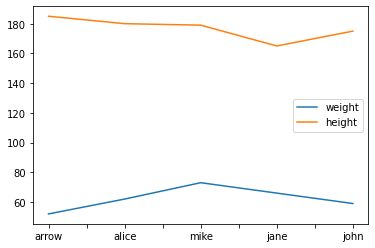

In [98]:
# 在作图之前，需要首先引入matplotlib.pyplot
import matplotlib.pyplot as plt
df06.plot()
plt.show()

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


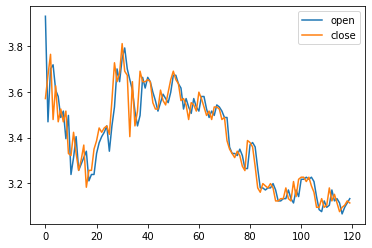

In [100]:
import tushare as ts
stock_price=ts.get_k_data(code='000100',start='2016-01-01',end='2016-06-30')
stock_price[['open','close']].plot()
plt.show()

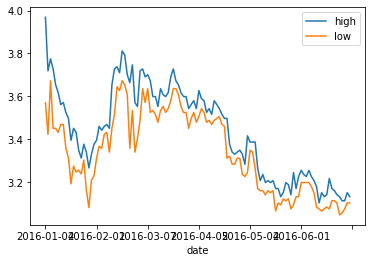

In [101]:
hist_price=stock_price.set_index('date')
hist_price[['high','low']].plot()
plt.show()

## 8.8 数据读取与写入

* pd.read_csv(filename) 从filename对应的csv文件中读取数据到一个DataFrame对象中
* df.to_csv(filename)  将df对象的内容写入到当前目录（或指定路径）中的文件中。

In [102]:
df_in01=pd.read_csv('data/country_code.csv')
df_in01.head()

,ISO English Country Names,Alpha-2 Code,Alpha-3 Code,Numeric Code
0,Afghanistan,AF,AFG,4
1,Aland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [103]:
#  写入csv文件
df01.to_csv('data/df01.csv')

 Excel文件的读取方式类似，只是多了几个参数。
 
 * pd.read_excel(io,sheetname,header...)
 * df.to_excel(excel_writer,sheet_name,...)

In [104]:
# 如果不指定sheetname，则自动从sheet1读取
df_in02=pd.read_excel('data/iso3166-1.xlsx')
df_in02.head()

,ISO English Country Names,Alpha-2 Code,Alpha-3 Code,Numeric Code
0,Afghanistan,AF,AFG,4
1,Aland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [105]:
hist_price.to_excel('data/hist_price.xlsx',
                    sheet_name='sheet1')

In [106]:
df09=pd.read_excel(
    'data/hist_price.xlsx',sheet_name='sheet1',
    index_col=0,na_values=['NA'])
df09.head()

,open,close,high,low,volume,code
date,,,,,,
2016-01-04,3.932,3.571,3.969,3.571,1850254,100
2016-01-05,3.469,3.673,3.719,3.423,2602644,100
2016-01-06,3.701,3.765,3.775,3.673,1614168,100
2016-01-07,3.719,3.479,3.728,3.451,517054,100
2016-01-08,3.608,3.627,3.654,3.451,2403484,100


## 8.9 索引的移动与移动窗口计算

以上介绍的DataFrame和Series的计算都是采用索引对齐方式进行的，但有时我们恰好需要的运算是索引之间具有一定的关系，而不是刚好对齐，怎么办？

例如：我们想知道股票价格相对上一个交易日上涨了多少？相对于上个月上涨了多少？股票价格过去30日的平均价格是如何变化的？

此时，我们就要用到索引的移动和移动窗口计算。

In [14]:
import tushare as ts
stock = ts.get_k_data('600000', start = '2020-01-01', end = '2022-01-01')
stock.info()

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


C:\Users\Jacob2021\AppData\Roaming\Python\Python39\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    486 non-null    object 
 1   open    486 non-null    float64
 2   close   486 non-null    float64
 3   high    486 non-null    float64
 4   low     486 non-null    float64
 5   volume  486 non-null    float64
 6   code    486 non-null    object 
dtypes: float64(5), object(2)
memory usage: 30.4+ KB


C:\Users\Jacob2021\AppData\Roaming\Python\Python39\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


In [15]:
stock.head()

,date,open,close,high,low,volume,code
0,2020-01-02,10.98,10.98,11.15,10.96,516290.0,600000
1,2020-01-03,11.08,11.11,11.14,10.98,380188.0,600000
2,2020-01-06,11.03,10.97,11.16,10.93,410011.0,600000
3,2020-01-07,11.02,11.01,11.11,10.97,284214.0,600000
4,2020-01-08,10.92,10.83,10.96,10.76,352405.0,600000


In [15]:
stock.set_index('date', inplace = True)
stock.tail()

,open,close,high,low,volume,code
date,,,,,,
2021-12-27,8.54,8.56,8.57,8.53,195277.0,600000
2021-12-28,8.56,8.57,8.59,8.54,298337.0,600000
2021-12-29,8.57,8.54,8.58,8.53,200501.0,600000
2021-12-30,8.54,8.54,8.58,8.53,232725.0,600000
2021-12-31,8.54,8.53,8.57,8.53,229296.0,600000


shift(n) 每行的索引为之后n行对应的索引

In [27]:
stock.close.shift(1)  # 现在做好了对齐的准备了

date
2020-01-02      NaN
2020-01-03    11.39
2020-01-06    11.52
2020-01-07    11.38
2020-01-08    11.42
              ...  
2021-12-27     8.54
2021-12-28     8.56
2021-12-29     8.57
2021-12-30     8.54
2021-12-31     8.54
Name: close, Length: 486, dtype: float64

In [16]:
stock['pct_change'] = stock.close / stock.close.shift(1) - 1  # 相对于上一个交易日的涨幅
stock.head()

,open,close,high,low,volume,code,pct_change
date,,,,,,,
2020-01-02,11.39,11.39,11.56,11.37,516290.0,600000,NaN
2020-01-03,11.49,11.52,11.55,11.39,380188.0,600000,0.011414
2020-01-06,11.44,11.38,11.57,11.34,410011.0,600000,-0.012153
2020-01-07,11.43,11.42,11.52,11.38,284214.0,600000,0.003515
2020-01-08,11.33,11.24,11.37,11.17,352405.0,600000,-0.015762


rolling生成一个移动窗口，窗口的大小由window指定，还可以指定窗口的位置和类型。

在生成一个移动窗口后，可以对于一个窗口里面的数据进行聚合运算。

In [20]:
stock['ma30'] = stock.close.rolling(window=30).mean()  # 先生成30日移动窗口，再求该窗口上的均值运算
stock.tail()

,open,close,high,low,volume,code,pct_change,ma30
date,,,,,,,,
2021-12-27,8.54,8.56,8.57,8.53,195277.0,600000,0.002342,8.612333
2021-12-28,8.56,8.57,8.59,8.54,298337.0,600000,0.001168,8.607000
2021-12-29,8.57,8.54,8.58,8.53,200501.0,600000,-0.003501,8.603333
2021-12-30,8.54,8.54,8.58,8.53,232725.0,600000,0.000000,8.602667
2021-12-31,8.54,8.53,8.57,8.53,229296.0,600000,-0.001171,8.598667


对于rolling窗口对象有很多聚合函数可以使用，包括：

count, max, min, median, mean, std, var, cov, kurt, skew, sum等。

如果我们希望进行的聚合操作需要自定义，则可以使用在rolling窗口对象上使用agg方法，传递一个函数作为参数。

In [25]:
stock['gap'] = stock.close.rolling(window = 30, min_periods= 2).agg(lambda x: x.max() - x.min())
stock.head()

,open,close,high,low,volume,code,pct_change,ma30,gap
date,,,,,,,,,
2020-01-02,11.39,11.39,11.56,11.37,516290.0,600000,NaN,NaN,NaN
2020-01-03,11.49,11.52,11.55,11.39,380188.0,600000,0.011414,NaN,0.13
2020-01-06,11.44,11.38,11.57,11.34,410011.0,600000,-0.012153,NaN,0.14
2020-01-07,11.43,11.42,11.52,11.38,284214.0,600000,0.003515,NaN,0.14
2020-01-08,11.33,11.24,11.37,11.17,352405.0,600000,-0.015762,NaN,0.28


## 本章小结

DataFrame对象的特征：
* 二维表，具有两个维度(axis)
* 行，对应于index
* 列，对应于columns
* 行和列都可以有命名标签
* 若创建时不指定索引，则系统会自动赋予从0开始的整数索引。


选择方式
* 利用标签索引，对应于loc
* 利用位置索引，对应于iloc
* 利用布尔索引

数据分析操作

* 数据连接
* 数据分组
* 统计操作


## 巩固练习

1. 找到你的学号对应的股票代码；
2. 获取股票的K线数据；
3. 将数据存储到工作目录中；
4. 对数据进行分析

In [107]:
import tushare as ts
k01=ts.get_k_data(code='000100',
                  start='2016-01-01',
                  end='2016-06-30')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


### 练习题 1

1. 查看数据，对数据进行描述；
2. 选出收盘价；
3. 选出某一天的数据；
4. 对某个月的数据求平均；
5. 对某个月的成交量求和；
6. 取出收盘价高于某个价格的数据；
7. 取出成交量高于某个数值的数据；

### 练习题 2

1. 求出每天收盘价与开盘价的差值；
2. 求出上涨和下跌的天数；
3. 再选取一只股票，求同一时期两只股票的收盘价的比值；
4. 求同一时期两只股票的成交量的比值；
5. 将两列比值存入新的DataFrame对象，并作图展示。